# Импорт данных


In [8]:
import pandas as pd
churn_data = pd.read_csv('D:\курс по data science\IDE\python_13\data\churn.csv')
display(churn_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# удаление столбца RowNumber
churn_data = churn_data.drop(['RowNumber'], axis=1)
display(churn_data.head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
import plotly
import plotly.express as px

import matplotlib.pyplot as plt
plt.style.use('default')

import seaborn as sns



## 1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

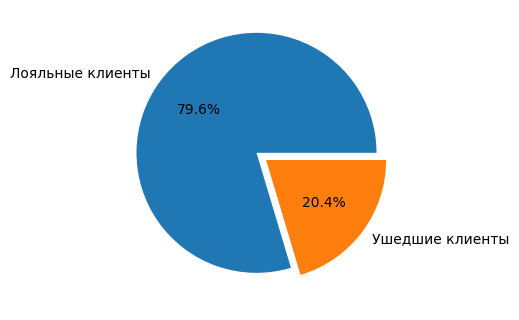

In [5]:
exited_data = churn_data['Exited'].value_counts()[:10]
fig = plt.figure(figsize=(3,3))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    exited_data,
    labels=['Лояльные клиенты','Ушедшие клиенты'],
    autopct='%.1f%%',
    explode=[0.1,0]
);


#### Выводы: из круговой диаграммы мы видим, 20,4% клиентов перестали пользоваться услугами банка, в то время как 79,6% клиентов продолжают работать с банком.

## 2.  Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

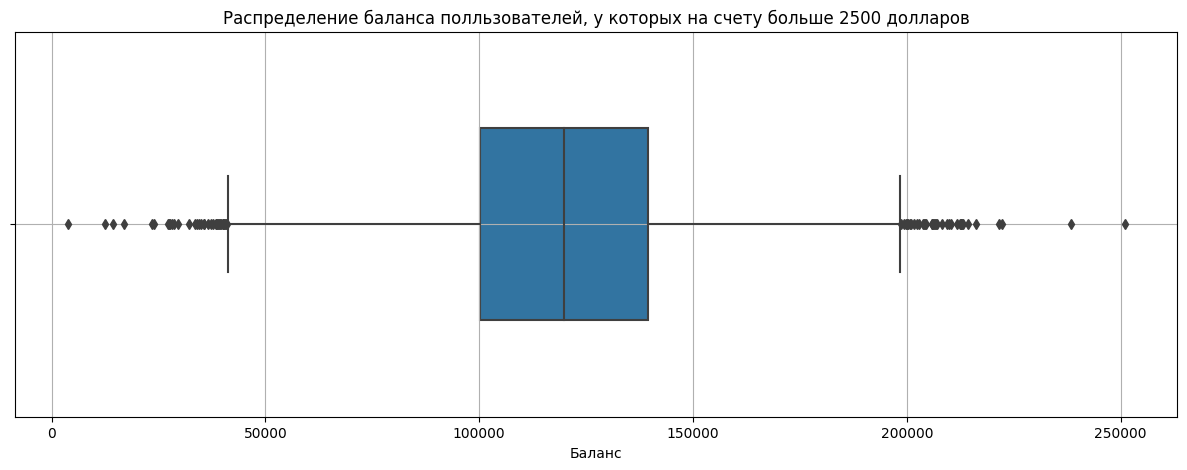

In [6]:
filtered_balance = churn_data[churn_data['Balance']>2500]

fig = plt.figure(figsize=(15,5))
boxplot = sns.boxplot(
    data = filtered_balance,
    x='Balance',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение баланса полльзователей, у которых на счету больше 2500 долларов');
boxplot.set_xlabel('Баланс');
boxplot.grid()

#### Выводы: 

## 3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


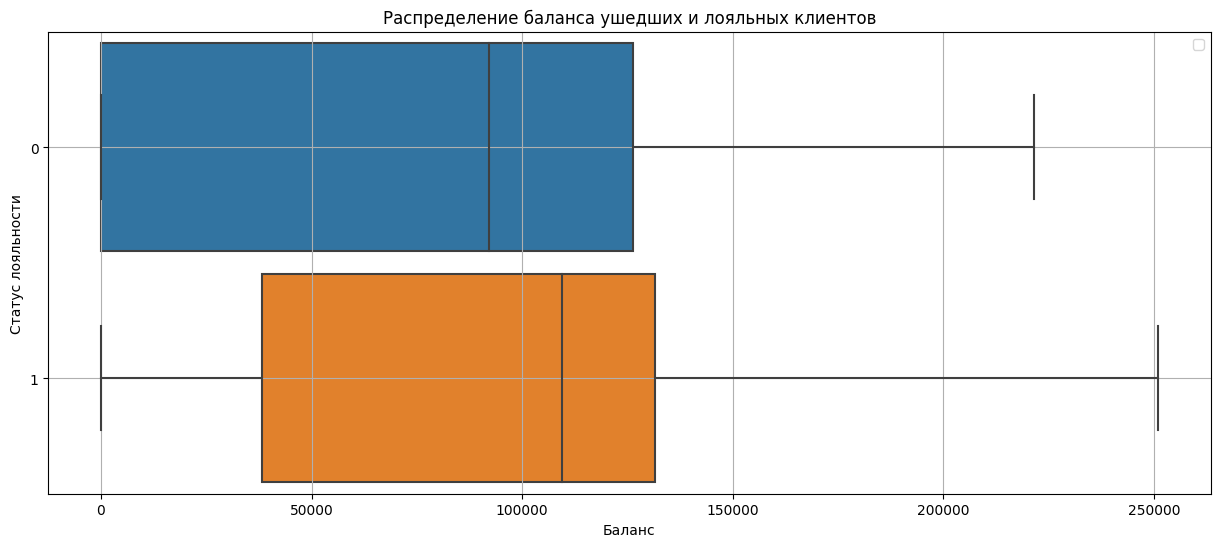

In [7]:
fig = plt.figure(figsize=(15,6))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9,
    )
boxplot.set_title('Распределение баланса ушедших и лояльных клиентов');
boxplot.set_ylabel('Статус лояльности');
boxplot.set_xlabel('Баланс');
boxplot.grid();
boxplot.legend();

#### Выводы: 


## 4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

#### Выводы: 

## 5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

#### Выводы: 

## 6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

#### Выводы: 

## 7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

#### Выводы: 

## 8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

#### Выводы: 

## 9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

#### Выводы: 

## 10.  Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
## Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
## На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

#### Выводы: 